In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd/gdrive/MyDrive/ice-cream vs waffle classification/

/gdrive/MyDrive/ice-cream vs waffle classification


In [4]:
ls

ice_cream/  waffles/


In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img

In [6]:
import os
import PIL
import pathlib
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

In [8]:
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS=30
CHANNELS=3

In [9]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/gdrive/MyDrive/ice-cream vs waffle classification",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 694 files belonging to 2 classes.


In [10]:
class_names = dataset.class_names
class_names

['ice_cream', 'waffles']

In [11]:
len(dataset)

12

In [12]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(image_batch[1])
  print(label_batch.numpy())

(62, 256, 256, 3)
tf.Tensor(
[[[251.18192  249.69922  250.69922 ]
  [246.81754  248.53629  249.83871 ]
  [ 82.50665   89.0379    94.18634 ]
  ...
  [245.23438  251.23438  249.23438 ]
  [246.       252.       252.      ]
  [244.47656  250.47656  250.47656 ]]

 [[250.77795  248.77795  249.77795 ]
  [245.20053  246.91928  249.34897 ]
  [ 96.18359  102.71484  107.86328 ]
  ...
  [245.23438  251.23438  249.23438 ]
  [246.       252.       252.      ]
  [244.47656  250.47656  250.47656 ]]

 [[252.69821  250.75406  251.72614 ]
  [243.56467  245.28342  247.7131  ]
  [113.20804  119.73929  124.887726]
  ...
  [245.23438  251.23438  249.23438 ]
  [246.       252.       252.      ]
  [244.47656  250.47656  250.47656 ]]

 ...

 [[251.47931  253.47931  248.47931 ]
  [246.86111  246.86111  246.86111 ]
  [ 81.25479   77.6376    75.10635 ]
  ...
  [230.96384  225.96384  222.96384 ]
  [233.       225.       222.      ]
  [233.       225.       222.      ]]

 [[251.47656  253.47656  248.47656 ]
  [246.0

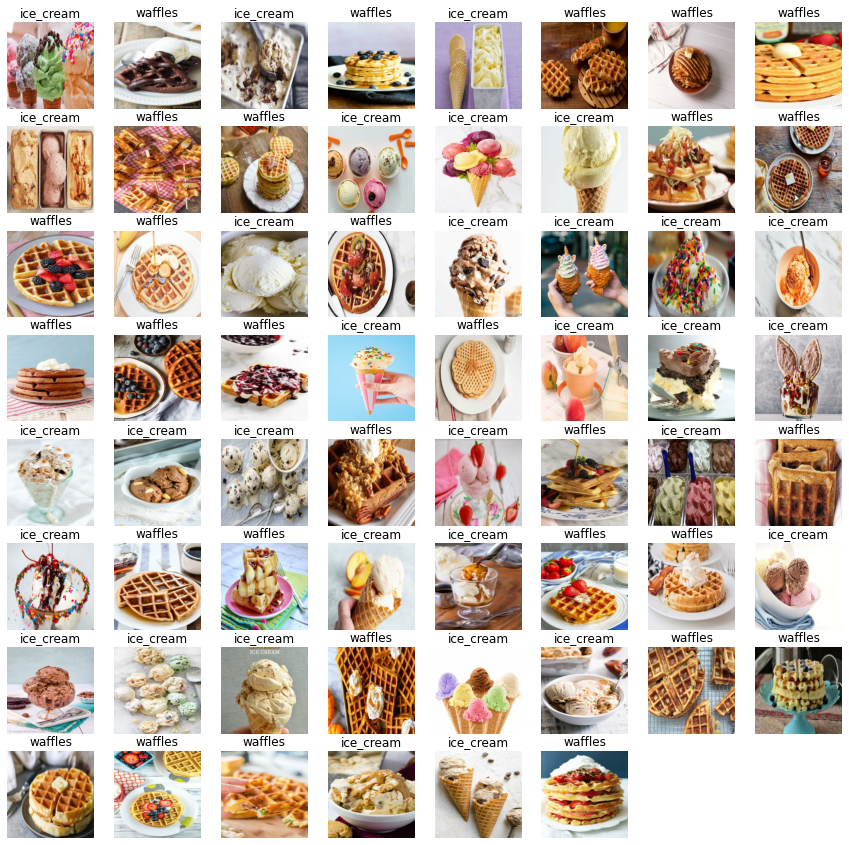

In [13]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [14]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    # Autotune all the 3 datasets 
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    return train_ds, val_ds, test_ds

In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [16]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [17]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [18]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9

model = models.Sequential([
    resize_and_rescale,
    # data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [19]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (62, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (62, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (62, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (62, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (62, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (62, 60, 60, 64)         

In [21]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/30
9/9 [==============================] - 68s 5s/step - loss: 1.2967 - accuracy: 0.4665 - val_loss: 0.9174 - val_accuracy: 0.5000
Epoch 2/30
9/9 [==============================] - 44s 5s/step - loss: 0.8044 - accuracy: 0.5256 - val_loss: 0.7887 - val_accuracy: 0.5000
Epoch 3/30
9/9 [==============================] - 45s 5s/step - loss: 0.7360 - accuracy: 0.5433 - val_loss: 0.7114 - val_accuracy: 0.5000
Epoch 4/30
9/9 [==============================] - 45s 5s/step - loss: 0.6756 - accuracy: 0.5354 - val_loss: 0.6615 - val_accuracy: 0.5645
Epoch 5/30
9/9 [==============================] - 45s 5s/step - loss: 0.5622 - accuracy: 0.7343 - val_loss: 0.4846 - val_accuracy: 0.8548
Epoch 6/30
9/9 [==============================] - 45s 5s/step - loss: 0.4352 - accuracy: 0.7953 - val_loss: 0.4020 - val_accuracy: 0.8387
Epoch 7/30
9/9 [==============================] - 46s 5s/step - loss: 0.3994 - accuracy: 0.8228 - val_loss: 0.5144 - val_accuracy: 0.6774
Epoch 8/30
9/9 [==================

In [22]:
model.evaluate(test_ds)

2/2 [==============================] - 4s 1s/step - loss: 0.2653 - accuracy: 0.9435


[0.2653064429759979, 0.9435483813285828]

In [23]:
acc = history.history['accuracy']
loss = history.history['loss']

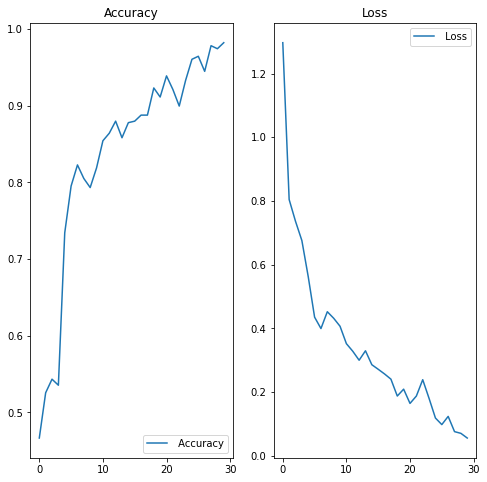

In [24]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label=' Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label=' Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

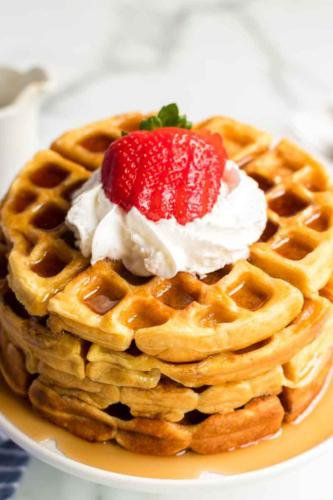

In [25]:
image_path = "/gdrive/My Drive/00000396.jpg"
image = preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
image

In [26]:
pred = model.predict(scaled_img)

In [27]:
output = class_names[np.argmax(pred)]

In [28]:
output

'waffles'

In [29]:
model.save("ice-cream vs waffle classification.h5")